# Assignment 1: NARMA10 task

In [11]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential


### Load the dataset

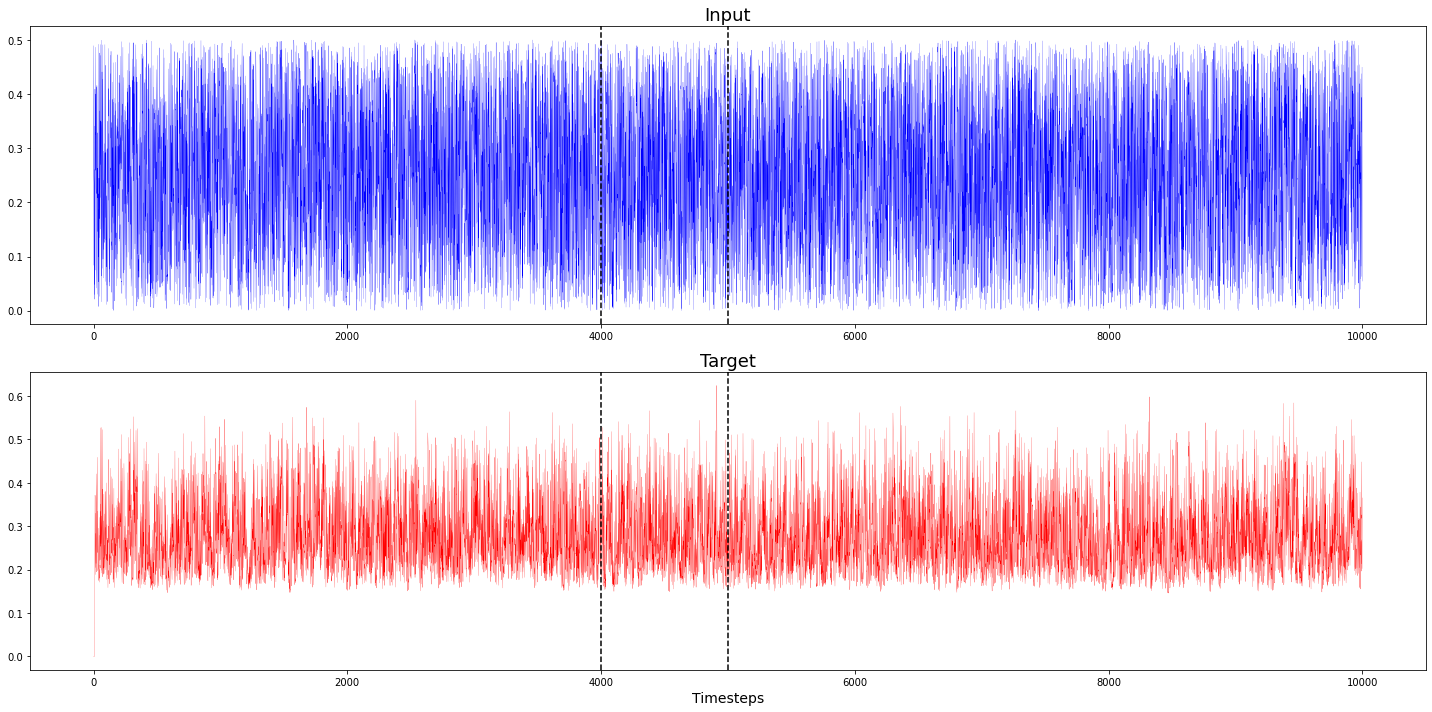

In [13]:
#load the data
x, y = np.loadtxt("NARMA10.csv", delimiter=",")


#split the dataset into training, validation and test
x_train = x[:4000]
x_valid = x[4000:5000] #validation
x_test = x[5000:]

y_train = y[:4000]
y_valid = y[4000:5000]
y_test = y[5000:]

#plot the data
t=np.arange(start=0,stop=len(x), step=1)
plt.figure(figsize = (20,10))
ax1 = plt.subplot(211)
plt.title('Input', fontsize=18)
ax1.plot(t,x, color = 'b', linewidth= 0.2)
ax1.axvline(x = 4000, color = 'black', linestyle= '--')
ax1.axvline(x = 5000, color = 'black', linestyle= '--')

ax2 = plt.subplot(212, sharex = ax1)
plt.title('Target', fontsize=18)
ax2.plot(t,y, color = 'r', linewidth = 0.2)
ax2.axvline(x = 4000, color = 'black', linestyle= '--')
ax2.axvline(x = 5000, color = 'black', linestyle= '--')
plt.xlabel('Timesteps', fontsize=14)
plt.tight_layout()



## TDNN

In [14]:
# Create a TDNN model
def create_model(input_shape,hidden_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_units,input_shape=input_shape, activation='tanh'))
    #model.add(Dense(units=30, activation='tanh'))
    model.add(Dense(units=1, activation='linear'))
    learning_rate = learning_rate
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [15]:
# Prepare the input X and target Y in order to implement the tdnn
def get_XY(x, y, window):
    # Remove the first "window" elements from y array
    Y = y[window:]
    # X will be an array containing "len(Y)" arrays created using the sliding window
    X = []
    rows_x = len(Y)
    j = 0
    for i in range(rows_x):
        X = np.append(X,x[j:j+window])
        j = j + 1

    #reshape X so it can be fed to the Dense layer
    X =  np.reshape(X, (rows_x, 1, window)) 
    return X, Y 

 
window = 10

#prepare the data
trainX, trainY = get_XY(x_train, y_train, window)
validX, validY = get_XY(x_valid, y_valid, window)
testX, testY = get_XY(x_test, y_test, window)

#check shape
print(trainX.shape,trainY.shape)

(3990, 1, 10) (3990,)


### Create the net

In [16]:
input_shape = (1, window)
hu=180  #hidden units
lr = 0.00036339055883970005  #learning rate


model = create_model(input_shape,hidden_units=hu, learning_rate=lr)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1, 180)            1980      
                                                                 
 dense_3 (Dense)             (None, 1, 1)              181       
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [17]:
history = model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2, validation_data = (validX, validY)).history

Epoch 1/30
3990/3990 - 7s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - 7s/epoch - 2ms/step
Epoch 2/30
3990/3990 - 5s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - 5s/epoch - 1ms/step
Epoch 3/30
3990/3990 - 5s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - 5s/epoch - 1ms/step
Epoch 4/30
3990/3990 - 5s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - 5s/epoch - 1ms/step
Epoch 5/30
3990/3990 - 5s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - 5s/epoch - 1ms/step
Epoch 6/30
3990/3990 - 5s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - 5s/epoch - 1ms/step
Epoch 7/30
3990/3990 - 5s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - 5s/epoch - 1

### Make plots of the loss and validation loss

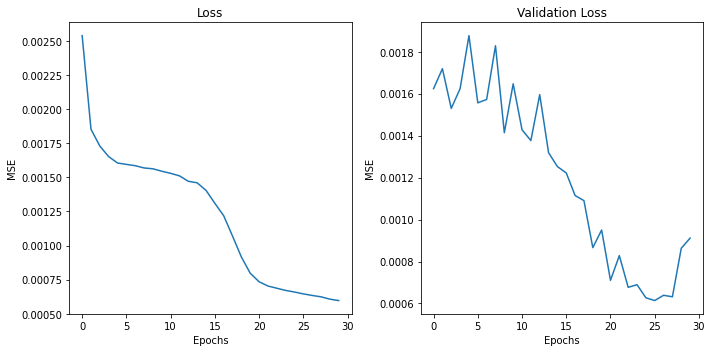

In [18]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.subplot(122)
plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

### Plots of target and output signals over time

156/156 [==============================] - 0s 1ms/step - loss: 0.0135 - mean_squared_error: 0.0135


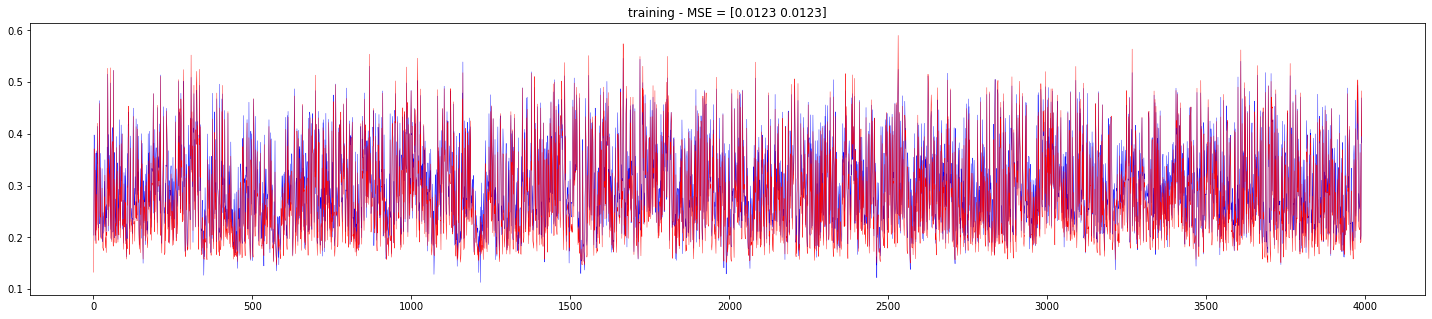

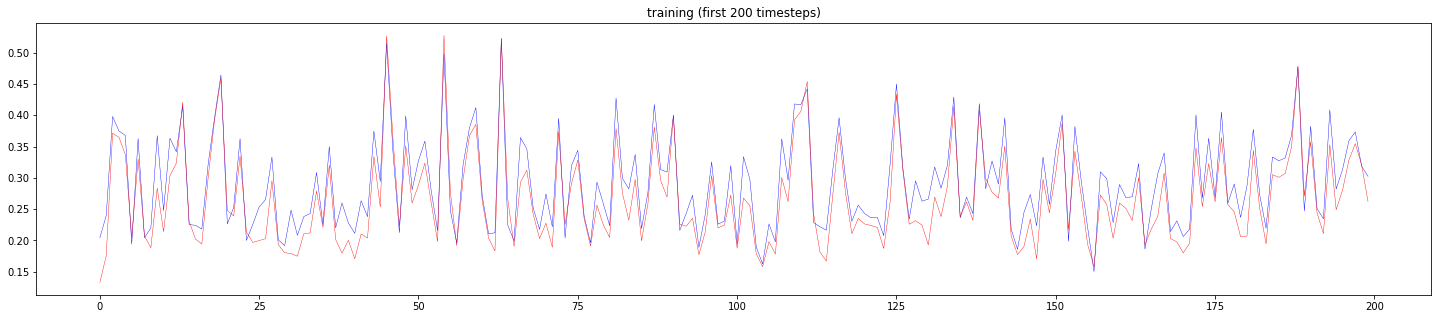

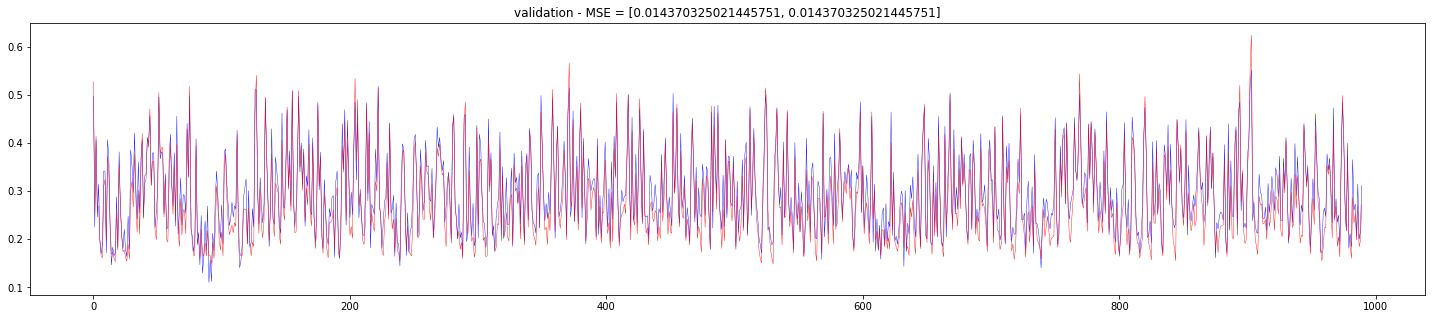

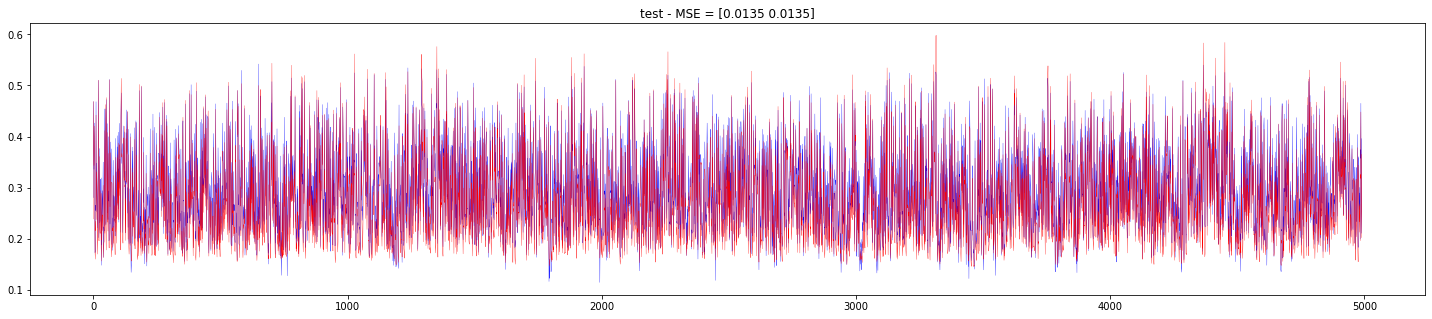

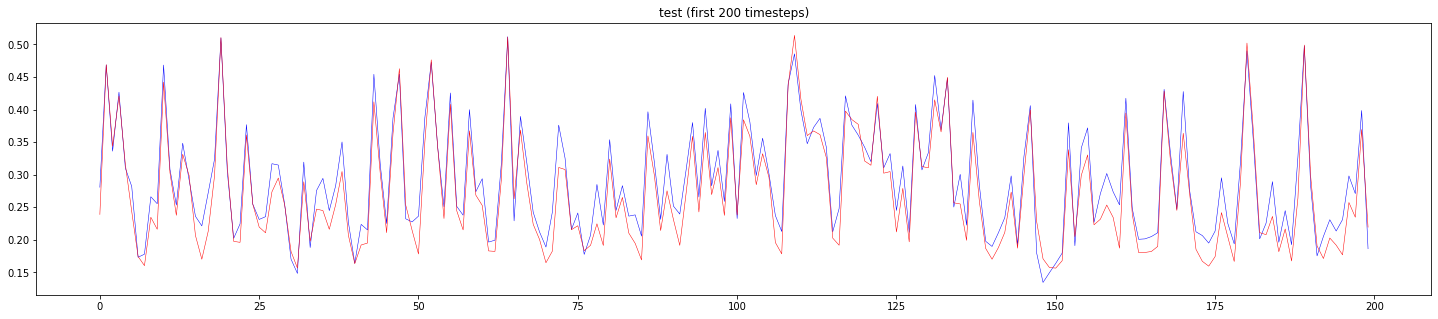

In [29]:
#training

y = model.predict(trainX)
mse = model.evaluate(trainX, trainY, batch_size=1)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (25,5))
plt.title(f'training - MSE = {np.round(mse,4)}')
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.4)
plt.plot(t,trainY.ravel(), color = 'r', linewidth= 0.4)

plt.figure(figsize = (25,5))
plt.title('training (first 200 timesteps)')
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],trainY.ravel()[:200], color = 'r', linewidth= 0.4)

#validation

y = model.predict(validX)
mse = model.evaluate(validX, validY, batch_size=1)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (25,5))
plt.title(f'validation - MSE = {mse}')
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.4)
plt.plot(t,validY.ravel(), color = 'r', linewidth= 0.4)

#test

y = model.predict(testX)
mse = model.evaluate(testX, testY)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (25,5), batch_size=1)
plt.title(f'test - MSE = {np.round(mse,4)}')
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,testY.ravel(), color = 'r', linewidth= 0.3)

plt.figure(figsize = (25,5))
plt.title('test (first 200 timesteps)')
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.5)
plt.plot(t[:200],testY.ravel()[:200], color = 'r', linewidth= 0.5)

